In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Step 2: Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Step 3: Basic inspection
print("First 5 rows:")
print(df.head())

print("\n Shape of data:", df.shape)

print("\n Column info:")
print(df.info())

print("\n Missing values per column:")
print(df.isnull().sum())

print("\n Summary statistics (numerical columns):")
print(df.describe())


First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

 Shape of data: (200, 5)

 Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
N

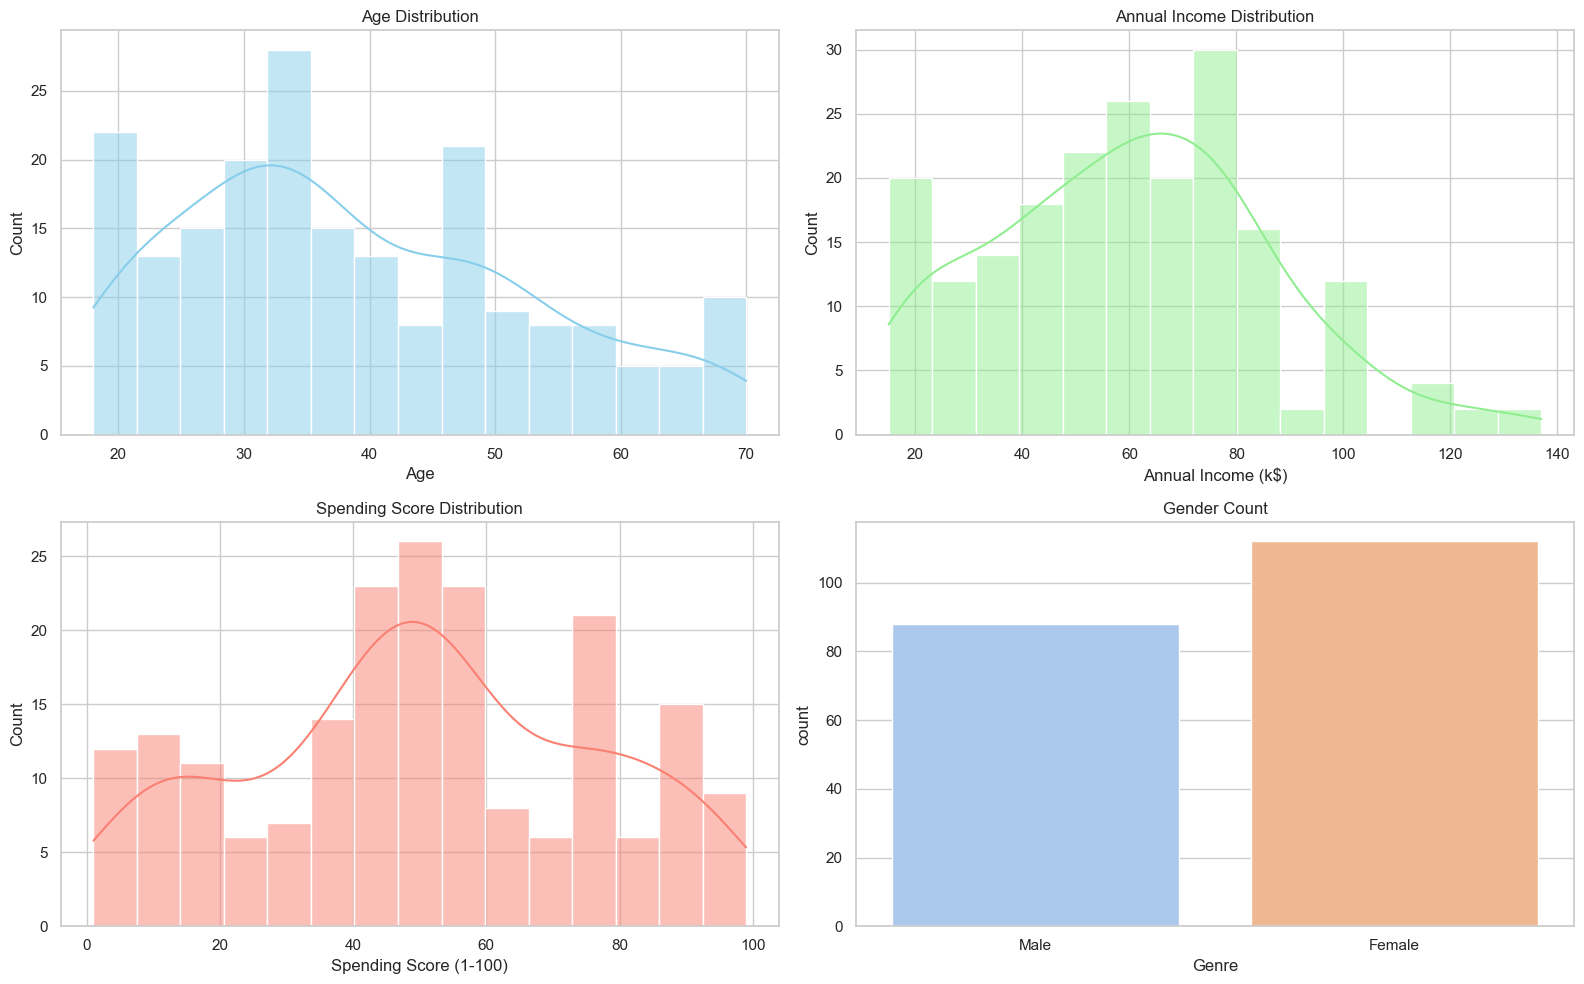

In [15]:

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

#  Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution")

#  Annual Income Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='lightgreen')
plt.title("Annual Income Distribution")

#  Spending Score Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='salmon')
plt.title("Spending Score Distribution")

#  Gender Count
plt.subplot(2, 2, 4)
sns.countplot(x='Genre', hue='Genre', data=df, palette='pastel', legend=False)
plt.title("Gender Count")

plt.tight_layout()
plt.show()


/var/folders/cr/djdcbymj15q1ck2084myh9h00000gn/T/ipykernel_13615/10739951.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df, palette='pastel')
/var/folders/cr/djdcbymj15q1ck2084myh9h00000gn/T/ipykernel_13615/10739951.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Annual Income (k$)', data=df, palette='cool')


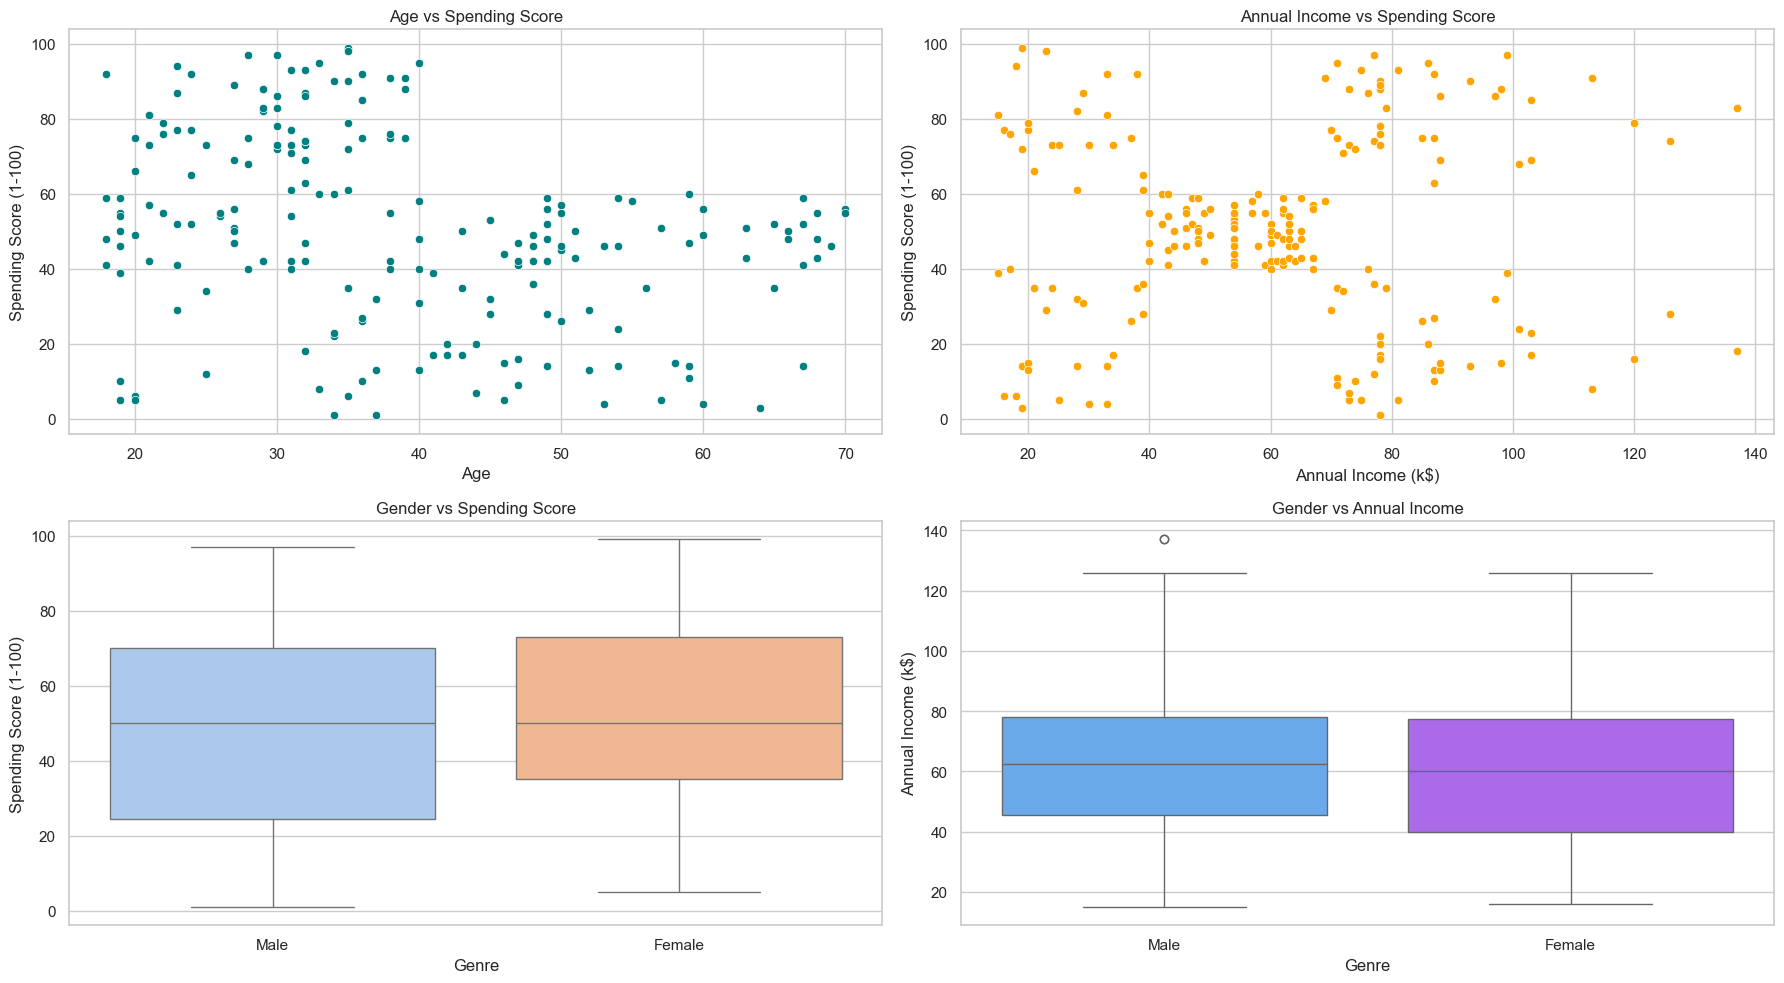

In [25]:
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# Age vs Spending Score
plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, color='teal')
plt.title("Age vs Spending Score")

# Income vs Spending Score
plt.subplot(2, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, color='orange')
plt.title("Annual Income vs Spending Score")

# Gender vs Spending Score
plt.subplot(2, 2, 3)
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df, palette='pastel')
plt.title("Gender vs Spending Score")

# Gender vs Income
plt.subplot(2, 2, 4)
sns.boxplot(x='Genre', y='Annual Income (k$)', data=df, palette='cool')
plt.title("Gender vs Annual Income")

plt.tight_layout()
plt.show()


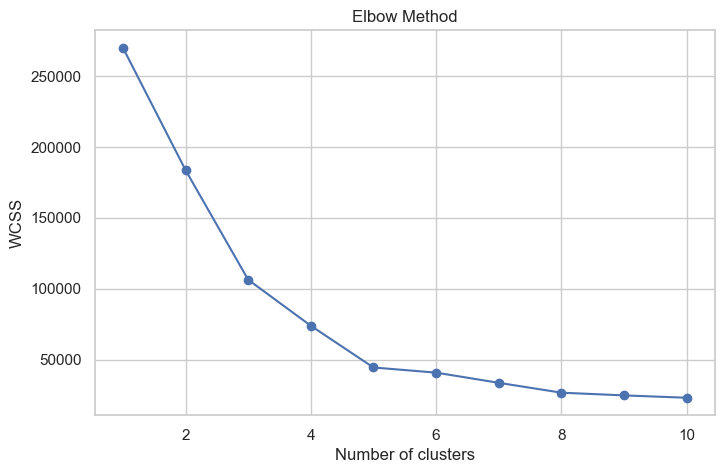

In [27]:
from sklearn.cluster import KMeans

# Use only the features we want for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 1: Find optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


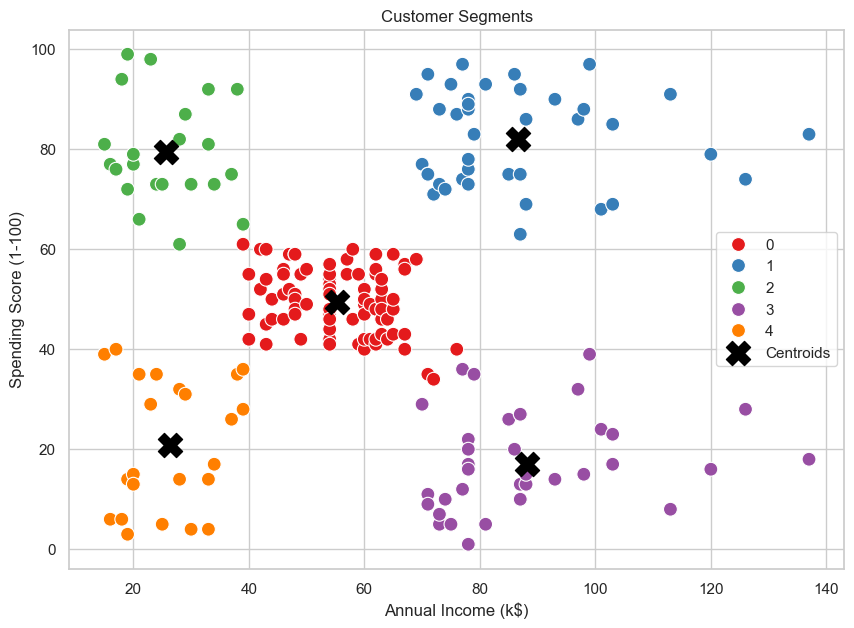

In [29]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#  Apply K-Means with optimal clusters (let's assume K=5 from Elbow Method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)  # Adds a new column 'Cluster' to the dataframe

# Visualize the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set1', data=df, s=100)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], s=300, c='black', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [31]:
# Check number of customers per cluster
print("Customers per cluster:")
print(df['Cluster'].value_counts())
print("\n")

#  Compute mean values per cluster
cluster_summary = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
print("Cluster Summary (Average metrics):")
print(cluster_summary)
print("\n")

#  Optional: describe cluster size and distribution
cluster_sizes = df.groupby('Cluster').size()
print("Cluster Sizes:")
print(cluster_sizes)


Customers per cluster:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


Cluster Summary (Average metrics):
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


Cluster Sizes:
Cluster
0    81
1    39
2    22
3    35
4    23
dtype: int64
